In [11]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0, DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Path dataset
DATASET_PATH = "D:/dataset/kupu"
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)
NUM_CLASSES = 8
EPOCHS = 20

In [13]:
# Augmentasi Data
data_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.3
)

In [14]:
train_generator = data_gen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 428 images belonging to 8 classes.


In [15]:
val_generator = data_gen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 182 images belonging to 8 classes.


In [16]:
# Tampilkan beberapa gambar dari dataset
def display_sample_images(generator, class_indices):
    plt.figure(figsize=(15, 15))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        img, label = generator.next()
        true_label = class_indices[np.argmax(label[0])]
        plt.imshow(img[0])
        plt.title(f'True: {true_label}')
        plt.axis('off')
    plt.show()

print("Displaying sample images from the dataset:")
display_sample_images(train_generator, list(train_generator.class_indices.keys()))

Displaying sample images from the dataset:


In [17]:
# Fungsi untuk membuat model
def build_model(base_model):
    base_model.trainable = False
    inputs = Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(NUM_CLASSES, activation='softmax')(x)
    return Model(inputs, outputs)

In [18]:
# Fungsi untuk plot metrik
def plot_metrics(history, model_name):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    plt.show()

In [19]:
# Fungsi untuk plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

In [20]:
# Model 1: EfficientNet
print("Training EfficientNet...")
efficient_net = EfficientNetB0(weights='imagenet', include_top=False)
model_efficient = build_model(efficient_net)
model_efficient.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_efficient = model_efficient.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)
plot_metrics(history_efficient, "EfficientNet")

Training EfficientNet...
Epoch 1/20
14/14 [==============================] - 39s 3s/step - loss: 1.9703 - accuracy: 0.1098 - val_loss: 1.8774 - val_accuracy: 0.1648
Epoch 2/20
14/14 [==============================] - 30s 2s/step - loss: 1.9048 - accuracy: 0.1425 - val_loss: 1.8800 - val_accuracy: 0.1648
Epoch 3/20
14/14 [==============================] - 30s 2s/step - loss: 1.8992 - accuracy: 0.1425 - val_loss: 1.8757 - val_accuracy: 0.1648
Epoch 4/20
14/14 [==============================] - 30s 2s/step - loss: 1.9087 - accuracy: 0.1379 - val_loss: 1.8798 - val_accuracy: 0.1648
Epoch 5/20
14/14 [==============================] - 30s 2s/step - loss: 1.9061 - accuracy: 0.1495 - val_loss: 1.8836 - val_accuracy: 0.1648
Epoch 6/20
14/14 [==============================] - 30s 2s/step - loss: 1.8928 - accuracy: 0.1519 - val_loss: 1.8751 - val_accuracy: 0.1648
Epoch 7/20
14/14 [==============================] - 30s 2s/step - loss: 1.8964 - accuracy: 0.1542 - val_loss: 1.8722 - val_accuracy: 0.

6/6 [==============================] - 10s 1s/step


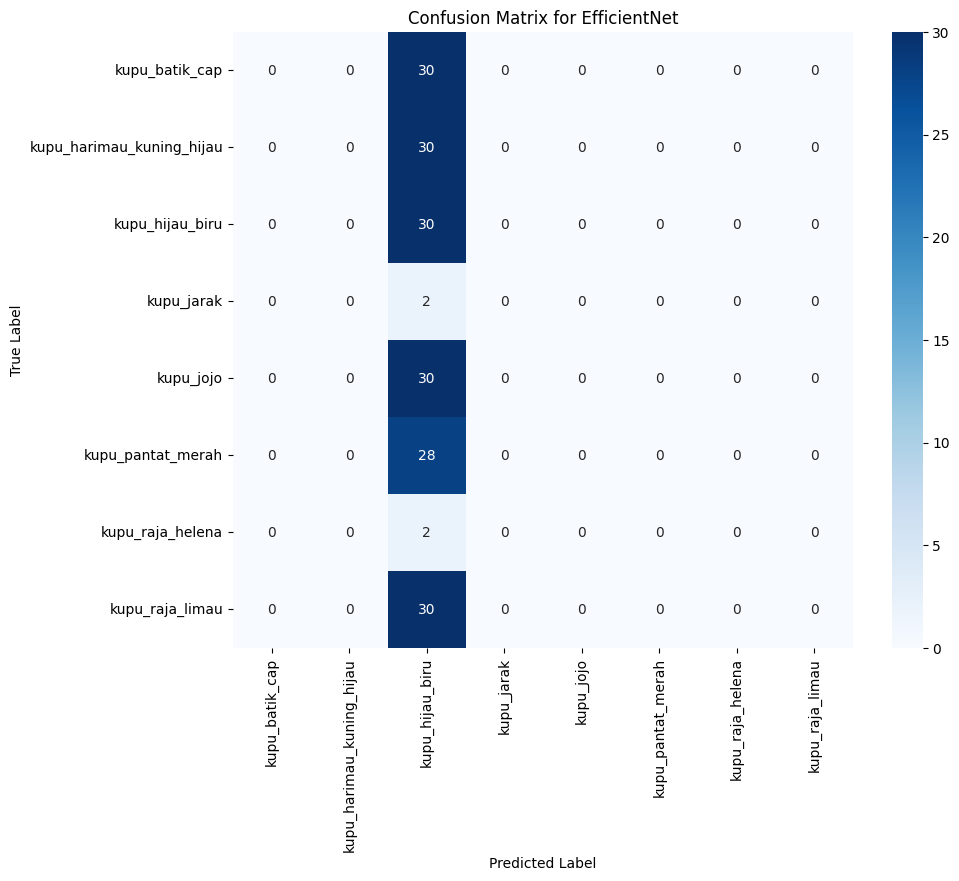

                           precision    recall  f1-score   support

           kupu_batik_cap       0.00      0.00      0.00        30
kupu_harimau_kuning_hijau       0.00      0.00      0.00        30
          kupu_hijau_biru       0.16      1.00      0.28        30
               kupu_jarak       0.00      0.00      0.00         2
                kupu_jojo       0.00      0.00      0.00        30
        kupu_pantat_merah       0.00      0.00      0.00        28
         kupu_raja_helena       0.00      0.00      0.00         2
          kupu_raja_limau       0.00      0.00      0.00        30

                 accuracy                           0.16       182
                macro avg       0.02      0.12      0.04       182
             weighted avg       0.03      0.16      0.05       182



c:\Users\Hafiz Atsal\miniconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hafiz Atsal\miniconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hafiz Atsal\miniconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [21]:
# Evaluasi model EfficientNet
val_generator.reset()
y_true = val_generator.classes
y_pred_efficient = np.argmax(model_efficient.predict(val_generator), axis=-1)
plot_confusion_matrix(y_true, y_pred_efficient, list(train_generator.class_indices.keys()), "EfficientNet")
print(classification_report(y_true, y_pred_efficient, target_names=list(train_generator.class_indices.keys())))

In [23]:
# Tampilkan beberapa prediksi dari set validasi untuk EfficientNet
def display_predictions(model, generator, class_indices, model_name):
    plt.figure(figsize=(15, 15))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        img, label = generator.next()
        pred = model.predict(img)
        true_label = class_indices[np.argmax(label[0])]
        pred_label = class_indices[np.argmax(pred[0])]
        plt.imshow(img[0])
        plt.title(f'True: {true_label}\nPred: {pred_label}')
        plt.axis('off')
    plt.suptitle(f'Predictions by {model_name}')
    plt.show()
    
print("Displaying EfficientNet Predictions:")
display_predictions(model_efficient, val_generator, list(train_generator.class_indices.keys()), "EfficientNet")

Displaying EfficientNet Predictions:
1/1 [==============================] - 0s 17ms/step


Training DenseNet...
Epoch 1/20
14/14 [==============================] - 36s 2s/step - loss: 1.7817 - accuracy: 0.3855 - val_loss: 1.1172 - val_accuracy: 0.7198
Epoch 2/20
14/14 [==============================] - 30s 2s/step - loss: 0.8340 - accuracy: 0.8107 - val_loss: 0.5574 - val_accuracy: 0.9176
Epoch 3/20
14/14 [==============================] - 31s 2s/step - loss: 0.4276 - accuracy: 0.9322 - val_loss: 0.3516 - val_accuracy: 0.9560
Epoch 4/20
14/14 [==============================] - 31s 2s/step - loss: 0.2728 - accuracy: 0.9626 - val_loss: 0.2598 - val_accuracy: 0.9670
Epoch 5/20
14/14 [==============================] - 30s 2s/step - loss: 0.1919 - accuracy: 0.9743 - val_loss: 0.1872 - val_accuracy: 0.9670
Epoch 6/20
14/14 [==============================] - 30s 2s/step - loss: 0.1446 - accuracy: 0.9860 - val_loss: 0.1623 - val_accuracy: 0.9835
Epoch 7/20
14/14 [==============================] - 30s 2s/step - loss: 0.1168 - accuracy: 0.9953 - val_loss: 0.1390 - val_accuracy: 0.9945

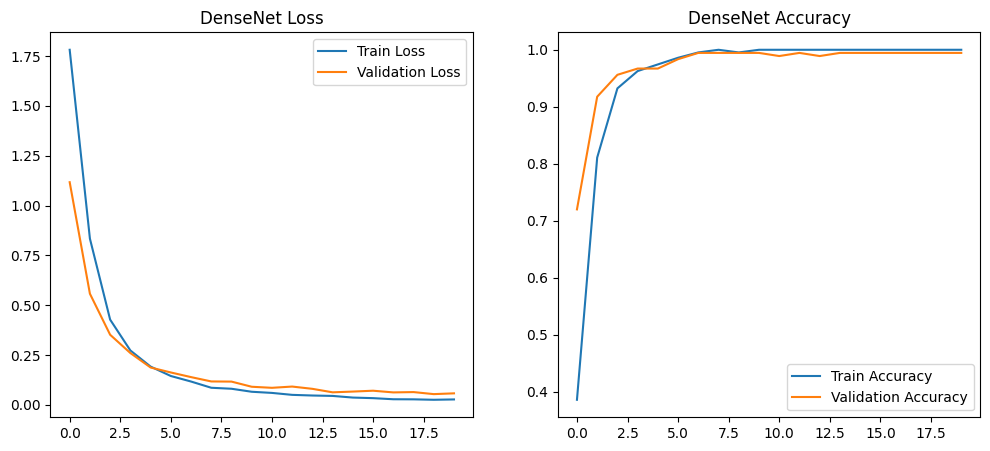

In [24]:
# Model 2: DenseNet
print("Training DenseNet...")
densenet = DenseNet121(weights='imagenet', include_top=False)
model_densenet = build_model(densenet)
model_densenet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history_densenet = model_densenet.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)
plot_metrics(history_densenet, "DenseNet")

6/6 [==============================] - 10s 1s/step


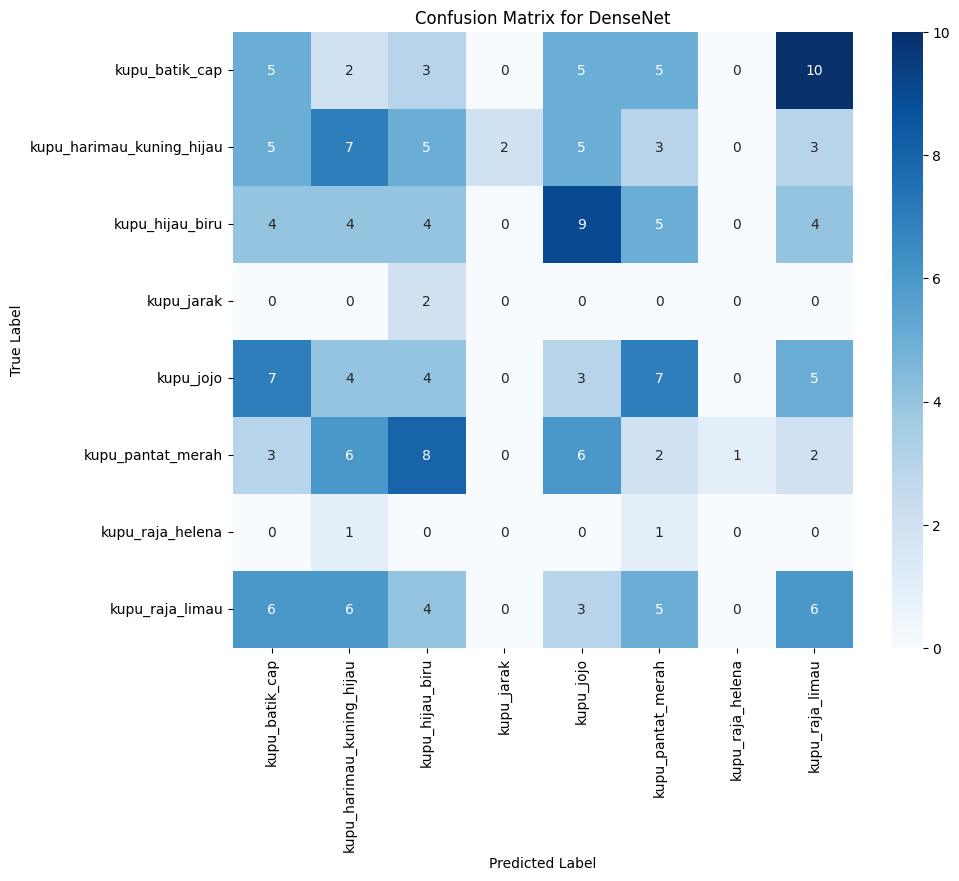

                           precision    recall  f1-score   support

           kupu_batik_cap       0.17      0.17      0.17        30
kupu_harimau_kuning_hijau       0.23      0.23      0.23        30
          kupu_hijau_biru       0.13      0.13      0.13        30
               kupu_jarak       0.00      0.00      0.00         2
                kupu_jojo       0.10      0.10      0.10        30
        kupu_pantat_merah       0.07      0.07      0.07        28
         kupu_raja_helena       0.00      0.00      0.00         2
          kupu_raja_limau       0.20      0.20      0.20        30

                 accuracy                           0.15       182
                macro avg       0.11      0.11      0.11       182
             weighted avg       0.15      0.15      0.15       182



In [25]:
# Evaluasi model DenseNet
val_generator.reset()
y_pred_densenet = np.argmax(model_densenet.predict(val_generator), axis=-1)
plot_confusion_matrix(y_true, y_pred_densenet, list(train_generator.class_indices.keys()), "DenseNet")
print(classification_report(y_true, y_pred_densenet, target_names=list(train_generator.class_indices.keys())))


Displaying DenseNet Predictions:
1/1 [==============================] - 0s 21ms/step


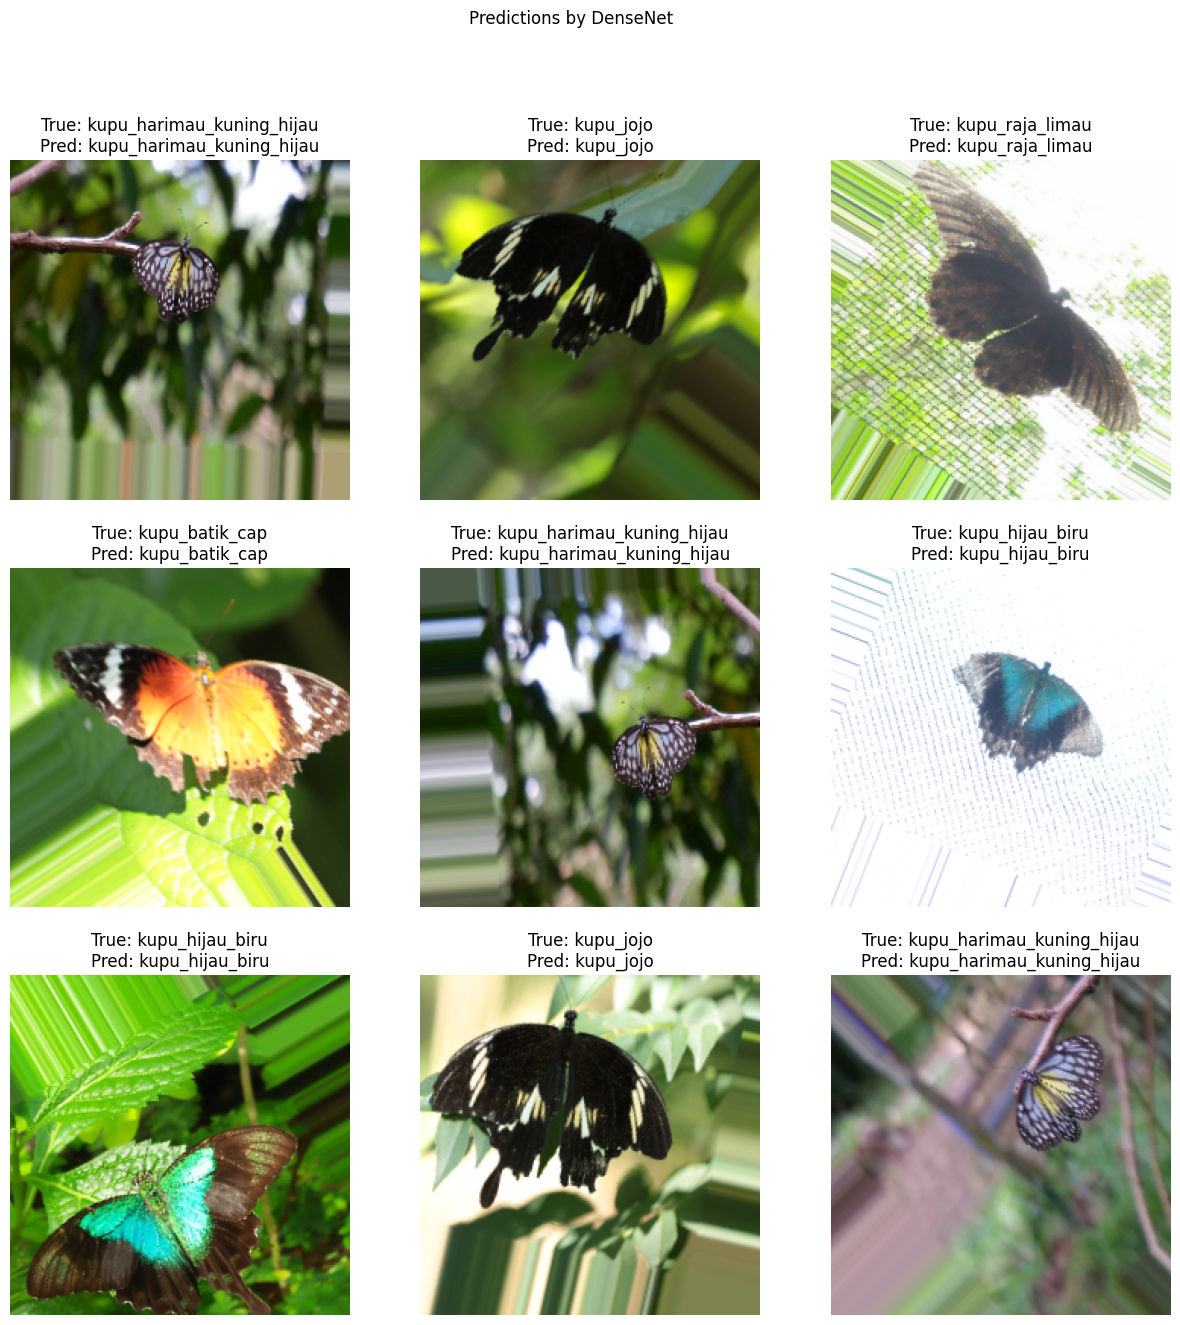

In [26]:
# Tampilkan beberapa prediksi dari set validasi untuk DenseNet
print("Displaying DenseNet Predictions:")
display_predictions(model_densenet, val_generator, list(train_generator.class_indices.keys()), "DenseNet")